# 1.Import packages

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# 2.Get Historic Pricing Data
data is from finance.yahoo.com in form of a .csv file.

In [291]:
df = pd.read_csv('TSLA2022-2023.csv')
print(df)
print(df.describe())

           Date        Open        High         Low       Close   Adj Close  \
0    2022-01-19  347.236664  351.556671  331.666656  331.883331  331.883331   
1    2022-01-20  336.576660  347.220001  331.333344  332.089996  332.089996   
2    2022-01-21  332.113342  334.850006  313.500000  314.633331  314.633331   
3    2022-01-24  301.586670  311.170013  283.823334  310.000000  310.000000   
4    2022-01-25  304.733337  317.086670  301.070007  306.133331  306.133331   
..          ...         ...         ...         ...         ...         ...   
246  2023-01-11  122.089996  125.949997  120.510002  123.220001  123.220001   
247  2023-01-12  122.559998  124.129997  117.000000  123.559998  123.559998   
248  2023-01-13  116.550003  122.629997  115.599998  122.400002  122.400002   
249  2023-01-17  125.699997  131.699997  125.019997  131.490005  131.490005   
250  2023-01-18  136.559998  136.679993  127.010002  128.779999  128.779999   

        Volume  
0     75442500  
1     70488600  


# 3.Prepare the data
Before developing our regression model we are going to trim our data. The ‘Date’ column will be converted to a DatetimeIndex and the ‘Adj Close’ will be the only numerical values we keep. Everything else is getting dropped.

In [292]:
df.set_index(pd.to_datetime(df['Date']), inplace=True)
print(df[['Adj Close']])
print(df.info())


             Adj Close
Date                  
2022-01-19  331.883331
2022-01-20  332.089996
2022-01-21  314.633331
2022-01-24  310.000000
2022-01-25  306.133331
...                ...
2023-01-11  123.220001
2023-01-12  123.559998
2023-01-13  122.400002
2023-01-17  131.490005
2023-01-18  128.779999

[251 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-19 to 2023-01-18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB
None


we try to get a visual picture of our data

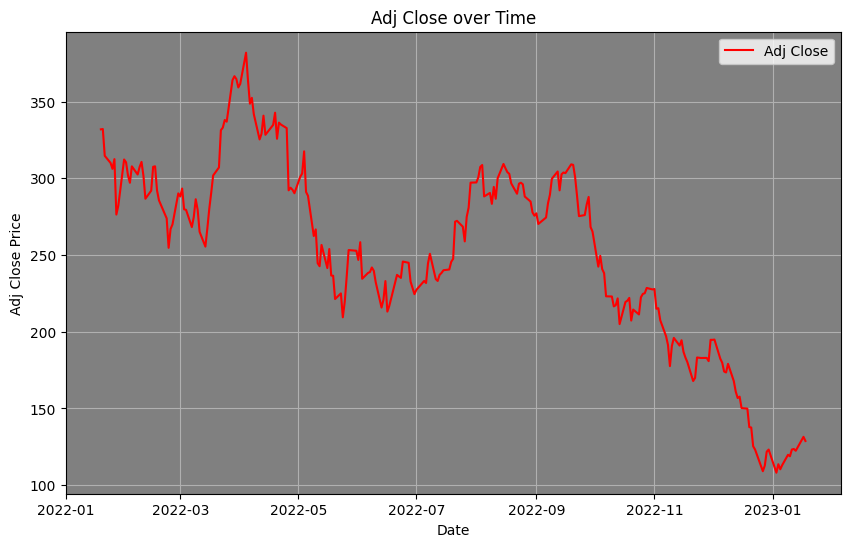

In [293]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='red')
plt.title('Adj Close over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('grey')
plt.show()

# 4.Adding Technical Indicators
Technical indicators are calculated values describing movements in historic pricing data for securities like stocks, bonds, and ETFs. Investors use these metrics to predict the movements of stocks to best determine when to buy, sell, or hold.
## 4.1.Train a model using EMA
### 4.1.1.adding EMA
To get started, let’s add an **exponential moving average (EMA)** to our data:

In [294]:
df['EMA_10'] = df['Adj Close'].ewm(span=10, adjust=False).mean()

### 4.1.2 drawing chart
let’s take a quick look at a plot of our data now to get an idea of how the EMA value tracks with the adjusted closing price.

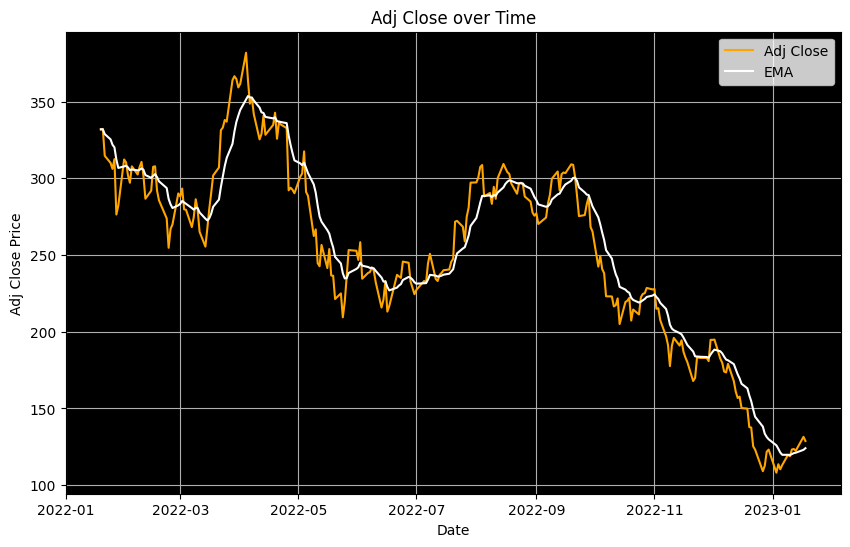

In [295]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='orange')
plt.plot(df.index, df['EMA_10'], label='EMA', color='white')
plt.title('Adj Close over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('black')
plt.show()

### 4.1.3 Training the Model
Now we’re ready to start developing our regression model to see how effective the EMA is at predicting the price of the stock.

In [296]:
X_train, X_test, y_train, y_test = train_test_split(df[['EMA_10']], df[['Adj Close']], test_size=.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 4.1.4 Validating the Fit

In [297]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[1.04794715]]
Mean Absolute Error: 11.626064264346743
Coefficient of Determination: 0.9151884311213363


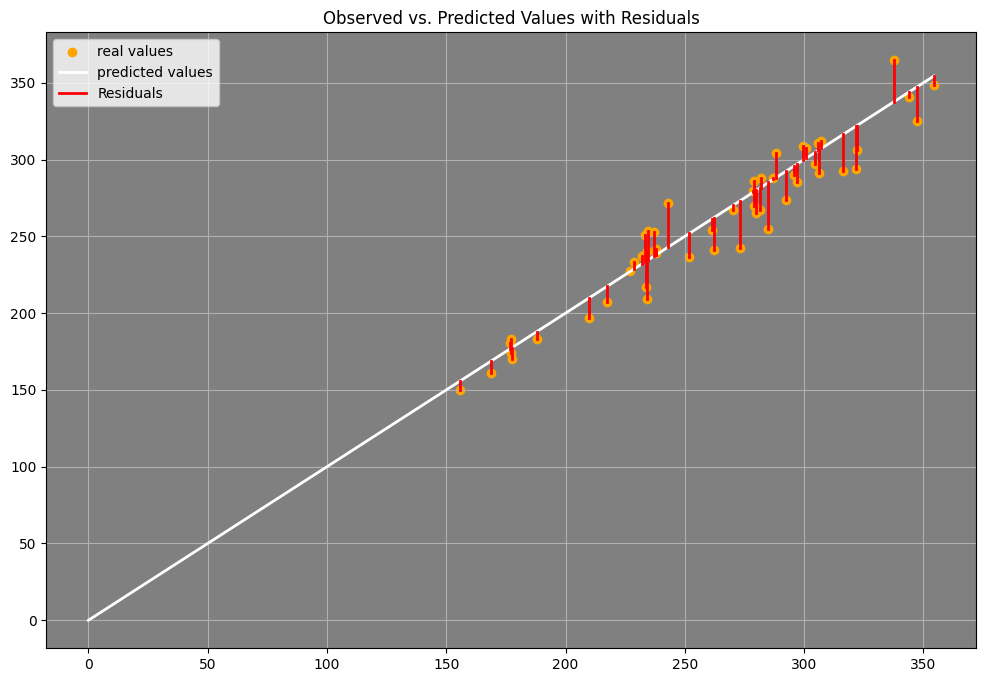

In [298]:
residuals = y_test - y_pred
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test, color='orange', marker='o', alpha=1, label='real values')
plt.plot([0, max(y_pred)[0]], [0, max(y_pred)[0]], color='white', linestyle='-', linewidth=2, label='predicted values')
for i in range(len(residuals)):
    plt.plot([y_pred[i], y_pred[i]], [y_test.iloc[i], y_pred[i]], color='red', linestyle='-', linewidth=2, alpha=1)
plt.plot([0,0], [0,0], color='red', linestyle='-', linewidth=2, alpha=1, label='Residuals')
plt.title('Observed vs. Predicted Values with Residuals')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('grey')
plt.show()

In [299]:
df_test = pd.read_csv('TSLA2023-2024.csv')
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test.set_index('Date', inplace=True)
df_test['EMA_10'] = df_test['Adj Close'].ewm(span=10, adjust=False).mean()
budget = 10000
shares_held = 0
for index, row in df_test.iterrows():
    row  = row.to_frame().transpose()
    predicted_ema_10 = model.predict(row[['EMA_10']])[0][0]
    if predicted_ema_10 > row[['Open']].values[0][0] and budget > row[['Open']].values[0][0]:
        shares_bought = int(budget / row[['Open']].values[0][0])
        shares_held += shares_bought
        budget -= shares_bought * row[['Open']].values[0][0]
        budget += shares_held * row[['Close']].values[0][0]
        shares_held = 0
    df = pd.concat([df, row], ignore_index=True)
    df = df.drop(df.index[0])
    df.reset_index(drop=True, inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(df[['EMA_10']], df[['Adj Close']], test_size=.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
print(f"Initial Budget: $10,000")
print(f"Final Budget after Simulation: ${budget:.2f}")

Initial Budget: $10,000
Final Budget after Simulation: $12945.00
